# Dépenses de consommation trimestrielles des ménages

## Data Management

### Importations des packages

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
#from mlxtend.plotting import plot_pca_correlation_graph
import os
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import seaborn as sns

cwd = os.getcwd()
from Fonction import graphique

### Importation des données

In [2]:
conso_tri = pd.read_csv('Ressources/Consommation des ménages trimestrielle.csv',sep=';')
conso_tri = conso_tri.set_index('Période').replace({',':'.'},regex=True).astype('float64')

### Year to year variations

In [3]:
yty_var = pd.DataFrame()

for column in conso_tri.columns:
    var = (conso_tri[column].diff(4)/conso_tri[column].shift(4)).iloc[4:].reset_index().drop('Période', axis = 1)
    yty_var[column] = var[var.columns[0]]

yty_var=yty_var.set_index(conso_tri.index.drop('1990T1').drop('1990T2').drop('1990T3').drop('1990T4')).T

In [4]:
yty_var

Période,1991T1,1991T2,1991T3,1991T4,1992T1,1992T2,1992T3,1992T4,1993T1,1993T2,...,2017T3,2017T4,2018T1,2018T2,2018T3,2018T4,2019T1,2019T2,2019T3,2019T4
Produits agricoles,0.085106,0.062500,0.061224,0.040816,-0.039216,-0.058824,-0.096154,-0.078431,-0.040816,-0.020833,...,0.000000,0.000000,0.011111,0.000000,0.022472,0.011111,0.000000,0.022222,0.010989,0.010989
"Energie, eau, déchets",0.166667,0.137255,0.115385,0.109091,0.089286,0.034483,0.051724,0.016393,0.016393,0.016667,...,0.022388,-0.014184,0.065693,-0.007353,0.029197,0.028777,-0.027397,0.081481,0.028369,-0.006993
Produits agro-alimentaires,0.031674,0.017937,0.035714,0.040000,0.026316,0.044053,0.030172,0.025641,0.029915,0.033755,...,0.011312,0.018100,0.017978,0.006711,0.017897,0.013333,0.006623,0.020000,0.013187,0.017544
Cokéfaction et raffinage,0.046154,0.048387,0.015385,0.000000,-0.014706,0.000000,-0.015152,-0.044118,-0.014925,0.015385,...,0.089109,0.056604,0.070796,0.145455,0.145455,0.133929,0.024793,0.015873,0.000000,-0.007874
Biens d'équipement,0.069767,0.045455,0.022222,0.000000,0.000000,-0.021739,-0.021739,-0.021739,-0.021739,0.000000,...,0.038462,0.038462,0.012658,0.000000,-0.012346,-0.012346,0.012500,0.012500,0.000000,0.025000
Matériels de transport,-0.082569,-0.047619,-0.038095,-0.019802,0.030000,0.010000,0.029703,0.090909,-0.097087,-0.059406,...,0.084848,0.046243,0.046512,0.056497,0.039106,0.011050,0.022222,-0.032086,0.016129,0.065574
Autres produits industriels,0.047210,0.051282,0.021097,0.016327,0.004098,0.012195,0.024793,0.004016,0.012245,0.008032,...,0.031746,0.005208,-0.002591,0.005195,-0.012821,-0.005181,0.005195,0.000000,0.010390,0.018229
Construction,0.055556,0.055556,0.055556,0.052632,0.052632,0.052632,0.105263,0.050000,0.050000,0.100000,...,0.021739,0.021739,0.043478,0.065217,0.042553,0.063830,0.041667,0.020408,0.040816,0.020000
Commerce,0.055556,0.055556,0.052632,0.000000,0.000000,0.052632,0.000000,0.000000,0.052632,0.000000,...,0.058824,0.088235,0.085714,0.083333,0.055556,0.054054,0.026316,0.000000,0.052632,0.051282
Transport,0.000000,0.000000,0.027778,0.055556,0.085714,0.083333,0.054054,0.026316,0.026316,0.000000,...,0.061856,0.040404,0.039604,0.000000,0.029126,0.029126,0.019048,0.068627,0.037736,0.028302


## ACP

In [5]:
from sklearn.preprocessing import StandardScaler
X_yty_var = StandardScaler().fit_transform(yty_var.T)

pca = PCA()
X_pca = pd.DataFrame(pca.fit_transform(X_yty_var))
print(np.around(pca.explained_variance_ratio_,3))

[0.293 0.127 0.091 0.076 0.063 0.059 0.05  0.043 0.037 0.033 0.031 0.027
 0.019 0.018 0.014 0.01  0.008 0.001]


Text(0.5, 1.0, 'Variance expliquée')

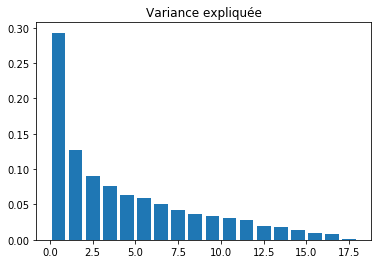

In [6]:
plt.bar(np.arange(len(pca.explained_variance_ratio_))+0.5, pca.explained_variance_ratio_)
plt.title("Variance expliquée")

In [7]:
#figure, correlation_matrix = plot_pca_correlation_graph(yty_var.T,  yty_var.T.columns, figure_axis_size=5)

In [8]:
principal_components = pd.DataFrame(pca.components_)
principal_components = principal_components.rename({i : 'PC'+str(i+1) for i in range(len(principal_components.columns))},axis=1)
principal_components = principal_components.rename(dict(zip(range(len(yty_var.T.columns)),yty_var.T.columns)))

In [9]:
principal_components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
Produits agricoles,-0.057967,-0.009791,-0.206542,-0.212587,-0.286928,-0.132358,-0.326237,-0.182181,-0.220848,-0.215477,-0.285986,-0.302313,-0.251700,-0.210912,-0.269579,-0.107170,-0.212407,-0.404633
"Energie, eau, déchets",-0.195164,0.304346,0.235915,-0.034448,-0.092090,-0.302971,-0.020912,0.238975,-0.308551,0.089777,-0.336299,0.092664,-0.006764,0.414259,-0.149756,0.476429,0.092605,-0.005750
Produits agro-alimentaires,0.391273,0.380406,0.328096,0.357920,-0.154959,-0.186826,0.101101,-0.045646,-0.142566,-0.095137,-0.065582,-0.163921,0.344782,-0.283750,-0.195066,-0.209042,-0.144157,0.180985
Cokéfaction et raffinage,0.500924,0.222146,0.077547,-0.363561,0.269309,-0.087102,0.130966,-0.150869,0.084890,-0.280851,0.030911,0.331526,-0.333210,0.136330,-0.242130,-0.097764,0.202751,-0.075182
Biens d'équipement,-0.013741,-0.316934,0.132157,-0.048928,0.281306,-0.035855,0.212162,-0.558114,-0.364470,0.388638,-0.042073,0.112924,0.083633,-0.200671,-0.215020,0.210495,-0.076799,-0.021907
Matériels de transport,0.045414,0.223475,0.314237,-0.028239,-0.079041,0.426420,-0.347531,-0.214439,0.245862,0.196404,-0.163295,0.230680,-0.150153,0.102193,0.082937,0.064494,-0.514399,0.077942
Autres produits industriels,0.072600,0.267004,-0.361955,-0.074552,0.049453,0.615900,-0.002362,-0.068499,-0.218773,-0.001617,-0.350429,-0.113588,0.176873,-0.049413,-0.067690,0.058489,0.360729,0.212064
Construction,0.337897,-0.238258,-0.137763,-0.270368,0.128704,-0.017570,0.065889,0.071928,-0.019705,-0.368861,-0.096516,-0.136321,0.390980,0.133889,0.214387,0.375854,-0.431301,0.046978
Commerce,-0.136038,-0.348540,0.428788,-0.130752,-0.441026,0.246144,0.155611,0.007246,-0.224908,-0.404267,-0.100506,0.310221,0.034691,-0.088994,0.096074,-0.103909,0.162501,0.061556
Transport,-0.005990,0.142952,-0.104703,0.355958,-0.006471,-0.112010,-0.051996,-0.528221,-0.267229,-0.269286,0.076212,-0.041975,-0.171554,0.308658,0.516368,-0.007234,0.064940,0.021189


Les 3 premières composantes principales représentent plus de 50%. Les catégories qu'on en déduit sont : 
- PC1 : Produits agro-alimentaires ; Cokéfaction et raffinage ; Information communication 
- PC2 : Produits agro-alimentaires ; Energie, eau, déchets ; Biens d'équipement ; Commerce ; Information-communication 
- PC3 : Biens d’équipement ; Commerce ; Autres produits industriels ; Services aux entreprises ; Produits agro-alimentaires



## Analyse de la variance

### Calcul du poids de chaque catégorie

In [10]:
weights = pd.DataFrame()

for date in conso_tri.T.columns:
    weights[date] = conso_tri.T[date]*(1/conso_tri.T[date][17])

weights = weights.set_index(conso_tri.T.index).iloc[:-1,:].T

In [11]:
meanWeights = pd.DataFrame(weights.mean(), columns=['Poids moyen']).T

In [12]:
meanWeights.T

,Poids moyen
Produits agricoles,0.029587
"Energie, eau, déchets",0.042214
Produits agro-alimentaires,0.153231
Cokéfaction et raffinage,0.042582
Biens d'équipement,0.030978
Matériels de transport,0.062470
Autres produits industriels,0.144076
Construction,0.014645
Commerce,0.012431
Transport,0.029877


### Variance des variations

In [13]:
variance = pd.DataFrame(yty_var.iloc[:-1,:].T.var(), columns=["Variance de variations"]).T


In [14]:
variance.T

,Variance de variations
Produits agricoles,0.001128
"Energie, eau, déchets",0.002409
Produits agro-alimentaires,0.000166
Cokéfaction et raffinage,0.008345
Biens d'équipement,0.001748
Matériels de transport,0.004565
Autres produits industriels,0.000302
Construction,0.000896
Commerce,0.001350
Transport,0.000647


### Part de la variance

In [15]:
share_of_variance = pd.DataFrame()

totalVariance = 0

for i in range(0,17,1):
    totalVariance += variance.T['Variance de variations'][i]*meanWeights.T['Poids moyen'][i]

for column in variance.columns: 
    share_of_variance[column] = pd.Series([variance[column][0]*meanWeights[column][0]*100/totalVariance])

share_of_variance.index = ['Part de la variance en %']

In [16]:
share_of_variance.T.sort_values(by='Part de la variance en %')[::-1]

,Part de la variance en %
Services financiers,28.492339
Cokéfaction et raffinage,21.431423
Matériels de transport,17.200445
"Energie, eau, déchets",6.134297
Information-communication,4.683159
Biens d'équipement,3.264787
Services immobiliers,3.246148
Autres produits industriels,2.621125
Hébergement-restauration,2.544869
Produits agricoles,2.013147


In [17]:
share_of_variance.T["Part de la variance en %"].nlargest(6).sum()

81.20644857805407

Nouvelle analyse de la variance  : 

On en déduit donc les 3 catégories principales suivantes: Services financiers ; Cokéfaction et raffinage ; Matériel de transport  ;

# Sélection des variables officielles

## Importation des données

In [18]:
""" Import de la variable cible : conso """

conso = pd.read_csv('Ressources/Consommation des ménages trimestrielle.csv',sep=';')
conso = conso.set_index('Période').replace({',':'.'},regex=True).astype('float64')

""" Import des variables explicatives : goods, services, retail_trade """

goods = pd.read_csv('Ressources/Goods index.csv',sep=';').drop(range(6))
goods = goods.rename({'Titre :':'Date'},axis='columns').set_index('Date').replace({',':'.'},regex=True).astype('float64')

services = pd.read_csv('Ressources/Services index.csv',sep=';').drop(range(4))
services = services.rename({'Titre :':'Date'},axis='columns').set_index('Date').replace({',':'.'},regex=True).astype('float64')

retail_trade = pd.read_csv('Ressources/Retail trade index.csv',sep=';').drop(range(4)).reset_index().drop('index',axis=1)
retail_trade = retail_trade.rename({'Titre :':'Date'},axis='columns').set_index('Date').replace({',':'.'},regex=True).astype('float64')

services_90 = services.loc['Déc 2019':'Jan 1990'].reset_index()
goods_90 = goods.loc[:'01/01/1990'].reset_index()
goods_90['Date'] = retail_trade.reset_index()['Date'] 

""" Constitution d'une dataframe X explicative, et constitution d'une yty-var-indice """

X = retail_trade.merge(services_90,on='Date').merge(goods_90,on='Date').set_index('Date')
X_trimestriel = pd.DataFrame([X.iloc[3*k:3*(k+1)].mean() for k in range(int(len(X)/3))],columns=X.columns,index=conso.index[::-1]).iloc[::-1]


In [19]:
len(X.columns)

1369

Regardons comment les indices se répartissent entre brut et cvs

In [20]:
variablesOfficielles = X_trimestriel.columns

variablesOfficiellesBrut = [variable for variable in variablesOfficielles if "brut" in variable.lower() ]
variablesOfficiellesCvs = [variable for variable in variablesOfficielles if "cvs" in variable.lower() ]
variablesOfficiellesTendance = [variable for variable in variablesOfficielles if "tendance" in variable.lower() ]

In [21]:
total = len(variablesOfficiellesBrut) + len(variablesOfficiellesCvs) + len(variablesOfficiellesTendance)
total == len(variablesOfficielles)

False

## Analyse rapide et première sélection

En utilisant ce que nous avons fait précédemment nous savons que nous devons nous intéresser à des variables permettant de suivres les fonctions de consommation suivante : 
- Produits agro-alimentaires
- Cokéfaction et raffinage
- Biens d'équipement
- Commerce     
- Matériel de transport
- Information communication
- Services financiers 

En effet : 

L'ACP retient les catégories suivantes : Produits agro-alimentaires (*3) ; Information communication (*2) ; Cokéfaction et raffinage ; Energie, eau, déchets ; Biens d'équipement(*2) ; Commerce(*2) ; Autres produits industriels ; Services aux entreprises ; 
L'analyse de la variance celles-ci : Services financiers ; Cokéfaction et raffinage ; Matériel de transport

Mais nous disposons dans notre jeu de donnée de plus de 1300 variables. Nous allons donc devoir commencer par le simplifier. Pour cela nous allons le "découper" en sous-catégories.
Puis nous sélectionneront les sous-catégories intéressantes pour chacune des fonction de consommation ce qui nous donneras une présélection des variables. 

In [22]:
def create_subcategories(datasetVariables) : 

    groups = dict()
    groups["Non catégorisés"] = []

    for i in range(len(datasetVariables)) : 
    
        completeVariable = datasetVariables[i]

        separator = ","

        if not completeVariable.find(",") == -1 :
            separator = ","
        elif not completeVariable.find("-") == -1 :
            separator = "-"
        else :
            separator = ""
    
        if not separator == "" :
            cuts = completeVariable.split(separator)
            category = (separator.join(cuts[:len(cuts)-1]),cuts[0])[len(cuts)<3]
            shortVariable = cuts[len(cuts)-1]
                
            if not category in groups : 
                groups[category] = list()
    
            groups[category].append(shortVariable)

        else : 
            groups["Non catégorisés"].append(completeVariable)

    indexCategories = pd.DataFrame(groups.keys(), columns=["categories"])

    indexCategories["length"] = range(len(indexCategories["categories"]))

    for i in range(len(indexCategories["categories"])):
        indexCategories["length"][i] = len(groups[indexCategories["categories"][i]])
    
    return indexCategories, groups

In [23]:
indexCategories, sortedOutInputs = create_subcategories(variablesOfficielles)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [24]:
len(indexCategories)

112

Regardons les sous-catégories qui composent notre jeu de données et choisissons celles que nous allons garder.

In [25]:
indexCategories.categories[0:25]

0                                       Non catégorisés
1                                      Vente à distance
2                                    Commerce de détail
3                                   Grande distribution
4                                 Produits alimentaires
5                                  Produits Industriels
6                                        Petit commerce
7              Voitures et véhicules automobiles légers
8                               Equipements automobiles
9                                  Cycles et motocycles
10    Alimentation générale, Petit commerce traditio...
11    Alimentation générale hors boucherie, Supermar...
12    Alimentation générale hors boucherie, Hypermar...
13                                         Supermarchés
14                                         Hypermarchés
15                                      Grands magasins
16                             Matériels audio et vidéo
17                                            Br

In [26]:
indexCategories.categories[25:50]

25             Habillement, Petit commerce traditionnel
26    Habillement, Grande surface spécialisée et suc...
27                        Habillement, Vente à distance
28                   Habillement, Hyper et supermarchés
29                                            Chaussure
30                             Produits pharmaceutiques
31                     Parfumerie et produits de beauté
32                             Horlogerie et bijouterie
33                                              Optique
34              Transports, hébergement et restauration
35                          Hébergement et restauration
36    Activités informatiques et services d'information
37                         Information et communication
38    Activités spécialisées, scientifiques, techniq...
39    Activités de services administratifs et de sou...
40                         Autres activités de services
41    Activités indifférenciées des ménages en tant ...
42    Activités juridiques et comptables,conseil

In [27]:
indexCategories.categories[50:75]

50    Activités spécialisées, scientifiques, techniq...
51                 Industries agricoles et alimentaires
52    Equipements électriques et électroniques, autr...
53                Fabrication de matériels de transport
54            Fabrication d'autres produits industriels
55               Textiles, habillement, cuir, chaussure
56    Travail du bois, industries du papier et impri...
57                                   Industrie chimique
58                             Industrie pharmaceutique
59       Produits en caoutchouc et en plastique, autres
60    Métallurgie et fabrication de produits métalli...
61    Fabrication produits informatiques, électroniq...
62                Fabrication d'équipements électriques
63        Fabrication de machines et équipements n.c.a.
64    Autres industries manufacturières, réparation,...
65                             Industrie manufacturière
66                                 Industrie automobile
67          Fabrication d'autres matériels de tr

In [28]:
indexCategories.categories[75:100]

75    Autres produits minéraux non métalliques hors ...
76                                             Fonderie
77                Forge, traitement des métaux, usinage
78    Coutellerie, outillage, quincaillerie, ouvrage...
79    Fabrication de composants et cartes électroniques
80                     Fabrication d'appareils ménagers
81         Fabrication d'autres équipements électriques
82     Fabrication de machines agricoles et forestières
83    Machines de formage des métaux et machines-outils
84     Fabrication d'autres machines d'usage spécifique
85                Fabrication d'équipements automobiles
86    Locomotives et autre matériel ferroviaire roulant
87    Articles de sport, jeux et jouets et autres ac...
88                                     Autre imprimerie
89    Fabrication d'autres produits chimiques inorga...
90    Fabrication d'autres produits chimiques organi...
91           Fabrication de matières plastiques de base
92    Fabrication de peintures, vernis, encres e

In [29]:
indexCategories.categories[100:112]

100    Fabrication d'éléments en matières plastiques ...
101    Fabrication de pièces techniques à base de mat...
102    Fabrication de produits de consommation couran...
103    Fabrication de moteurs, génératrices et transf...
104          Fabrication d'autres pompes et compresseurs
105        Fabrication d'autres articles de robinetterie
106    Fabrication de matériel de levage et de manute...
107    Fabrication de machines pour l'extraction ou l...
108                Construction de véhicules automobiles
109                Industries agricoles et alimentaires 
110               Fabrication d'équipements électriques 
111                            Industrie manufacturière 
Name: categories, dtype: object

In [30]:
sortedOutInputs["Non catégorisés"]

['Indicateur mensuel du climat des affaires dans les services marchands (cvs)',
 "Indicateur mensuel du climat des affaires dans l'industrie manufacturière (cvs)",
 "Indicateur trimestriel du climat des affaires dans l'industrie manufacturière (cvs)"]

Voici les sous-catégories que nous allons garder pour suivre les différentes fonctions de consommation dont nous avons besoin.

In [31]:
agroAlimentaire = [4,10,11,12,51,109]
cokefactionRaffinage = [74,91]
bienEquipement = [18,52,62,80,81]
commerce = [1,2,3,6,13,14,15]
informationCommunication = [16,36,37]
materielTransport = [34,45,86]

#serviceAuxEntreprises = [36,37,39,40,42]
#hebergementRestauration = [35]

In [32]:
def shortlisted_variables_information(subCategories,indexCategories,names=False):

    variablesNumber = 0
    listNames = []

    for element in subCategories:
        variablesNumber += indexCategories.length[element]
        ("",listNames.append(indexCategories.categories[element]))[names]

    return (variablesNumber, (variablesNumber,listNames))[names]

Décommentez la ligne (ci-dessous) contenant la fonction de consommation que vous voulez suivre pour connaître le nom des sous-catégories de variables qui ont été préséléctionnées.

In [33]:
#shortlisted_variables_information(agroAlimentaire,indexCategories,True)[1]
#shortlisted_variables_information(cokefactionRaffinage,indexCategories,True)[1]
#shortlisted_variables_information(bienEquipement,indexCategories,True)[1]
#shortlisted_variables_information(commerce,indexCategories,True)[1]
#shortlisted_variables_information(informationCommunication,indexCategories,True)[1]
#shortlisted_variables_information(informationCommunication,materielTransport,True)[1]

#shortlisted_variables_information(hebergementRestauration,indexCategories,True)[1]
#shortlisted_variables_information(serviceAuxEntreprises,indexCategories,True)[1]

In [34]:
nombreVariablesPreselectionnees = shortlisted_variables_information(agroAlimentaire,indexCategories)
nombreVariablesPreselectionnees += shortlisted_variables_information(cokefactionRaffinage,indexCategories)
nombreVariablesPreselectionnees += shortlisted_variables_information(commerce,indexCategories)
nombreVariablesPreselectionnees += shortlisted_variables_information(bienEquipement,indexCategories)
nombreVariablesPreselectionnees += shortlisted_variables_information(informationCommunication,indexCategories)
nombreVariablesPreselectionnees += shortlisted_variables_information(materielTransport,indexCategories)

#nombreVariablesPreselectionnees += shortlisted_variables_information(hebergementRestauration,indexCategories)
#nombreVariablesPreselectionnees += shortlisted_variables_information(serviceAuxEntreprises,indexCategories)

In [35]:
nombreVariablesPreselectionnees

272

Nous obtenons donc une présélection contenant 272 variables au lieu des 1300 du début

## Sélection par fonction de consommation

Maintenant il faut choisir les variables nous intéressant parmi toutes celles présélectionnées.
Pour faire cela nous prendre celles dont les variations sont les plus corrélées aux variations de leur fonction de consommation correspondante.

In [36]:
def inputs_reconstruction(subCategoryName, variables):

    inputs = []

    for variable in variables:
        inputs.append(",".join([subCategoryName,variable]))

    return inputs

def retrieve_data_frame_inputs(subCategories, indexCategories, sortedOutInputs, brut=True ,):

    subCategoriesVariables = []

    for i in range(len(subCategories)):
        category = indexCategories.categories[subCategories[i]]
        subCategoriesVariables += inputs_reconstruction(category,sortedOutInputs[category])

    subCategoriesVariables = [variable for variable in subCategoriesVariables if not ("cvs","brut")[not brut] in variable.lower()]
        
    return subCategoriesVariables

In [37]:
def analysis_of_variables_tracking_of_consumption_fonction(consumptionFonctionName,selectedSubCategories,indexCategories, sortedOutInputs, brut=True):

    subClassVariations = yty_var.T[consumptionFonctionName].to_frame("variations"+consumptionFonctionName).reset_index().drop(['Période'], axis=1)
    subCategoriesVariables = X_trimestriel[retrieve_data_frame_inputs(selectedSubCategories,indexCategories, sortedOutInputs, brut)]

    #calculs des variations de chacune des variables officielles 
    for column in subCategoriesVariables.columns:
        subClassVariations[column] = (subCategoriesVariables[column].diff(4)/subCategoriesVariables[column].shift(4)).iloc[4:].reset_index().drop('Période', axis = 1)
        

    variance = pd.DataFrame(subClassVariations.var()).T
    variance.index=['Variance de variation']
    
    variablesLesPlusCorrélés = pd.DataFrame(subClassVariations.corr()["variations"+consumptionFonctionName].abs().nlargest(20)).T
    variablesLesPlusCorrélés.index = ["Corrélation avec la fonction de consommation"]

    return variance.T, variablesLesPlusCorrélés.T

In [38]:
variablesSelectionBrut = []

### Sélection en valeurs brutes

#### Produits agro-alimentaires

In [39]:
variance, variables = analysis_of_variables_tracking_of_consumption_fonction("Produits agro-alimentaires",agroAlimentaire,indexCategories, sortedOutInputs)
variablesSelectionBrut.extend(variables.index[1:10].tolist())

In [40]:
variables

,Corrélation avec la fonction de consommation
variationsProduits agro-alimentaires,1.000000
"Produits alimentaires, indice en valeur (Brut)",0.718356
"Alimentation générale hors boucherie, Supermarchés, indice en valeur (Brut)",0.704878
"Alimentation générale hors boucherie, Hypermarchés, indice en valeur (Brut)",0.489267
"Produits alimentaires, indice en volume (Brut)",0.331930
"Industries agricoles et alimentaires, prévisions du prix des produits finis à 1 mois (Brut)",0.283620
"Alimentation générale, Petit commerce traditionnel, indice en valeur (Brut)",0.242174
"Alimentation générale hors boucherie, Supermarchés, indice en volume (Brut)",0.240246
"Industries agricoles et alimentaires, prévisions des stocks à 1 mois (Brut)",0.191980
"Industries agricoles et alimentaires, évolution du prix des produits finis par rapport au mois précédent (Brut)",0.165540


#### Cokéfaction et raffinage


In [98]:
variance, variables = analysis_of_variables_tracking_of_consumption_fonction("Cokéfaction et raffinage",cokefactionRaffinage,indexCategories, sortedOutInputs)

In [44]:
variablesSelectionBrut.extend(variables.index[1:10].tolist())

In [99]:
variables

,Corrélation avec la fonction de consommation
variationsCokéfaction et raffinage,1.000000
"Produits en plastique, taux moyen d'utilisation des capacités de production (Brut)",0.493800
"Fabrication de matières plastiques de base, évolution du stock des produits finis par rapport au mois précédent (Brut)",0.343315
"Produits en plastique, situation actuelle de l`état du carnet de commandes en fin de mois (Brut)",0.329502
"Fabrication de matières plastiques de base, prévisions du prix des produits finis à 1 mois (Brut)",0.309748
"Produits en plastique, évolution des effectifs par rapport au mois précédent (Brut)",0.279775
"Fabrication de matières plastiques de base, évolution des effectifs par rapport au mois précédent (Brut)",0.274925
"Fabrication de matières plastiques de base, situation actuelle des stocks de matières premières (Brut)",0.266028
"Produits en plastique, évolution des commandes reçues par rapport à l'année précédente (Brut)",0.249937
"Produits en plastique, évolution des commandes reçues par rapport au mois précédent (Brut)",0.228302


#### Biens d'équipement

In [45]:
variance, variables = analysis_of_variables_tracking_of_consumption_fonction(" Biens d'équipement",bienEquipement,indexCategories, sortedOutInputs)

In [46]:
variables

,Corrélation avec la fonction de consommation
variations Biens d'équipement,1.000000
"Appareils électroménagers, indice en volume (Brut)",0.406468
"Fabrication d'appareils ménagers, taux moyen d'utilisation des capacités de production (Brut)",0.405611
"Appareils électroménagers, indice en valeur (Brut)",0.388848
"Fabrication d'appareils ménagers, prévisions de la production à 1 mois (Brut)",0.305300
"Fabrication d'équipements électriques, taux moyen d'utilisation des capacités de production (Brut)",0.280039
"Equipements électriques et électroniques, autres machines, taux moyen d'utilisation des capacités de production (Brut)",0.251351
"Fabrication d'autres équipements électriques, situation actuelle de l`état du carnet de commandes en fin de mois (Brut)",0.232218
"Equipements électriques et électroniques, autres machines, évolution des livraisons par rapport au mois précédent (Brut)",0.214384
"Equipements électriques et électroniques, autres machines, évolution du stock des produits finis par rapport au mois précédent (Brut)",0.200151


In [47]:
variablesSelectionBrut.extend(variables.index[1:10].tolist())

#### Commerce

In [48]:
variance, variables = analysis_of_variables_tracking_of_consumption_fonction("Commerce",commerce,indexCategories, sortedOutInputs)

In [49]:
variablesSelectionBrut.extend(variables.index[1:10].tolist())

#### Matériels de transport


In [50]:
variance, variables = analysis_of_variables_tracking_of_consumption_fonction("Matériels de transport",materielTransport,indexCategories, sortedOutInputs)

In [51]:
variablesSelectionBrut.extend(variables.index[1:10].tolist())

#### Information communication

In [52]:
variance, variables = analysis_of_variables_tracking_of_consumption_fonction("Information-communication",informationCommunication,indexCategories, sortedOutInputs)

In [53]:
variables

,Corrélation avec la fonction de consommation
variationsInformation-communication,1.000000
"Matériels audio et vidéo, indice en valeur (Brut)",0.451928
"Information et communication, évolution de l'activité par rapport au mois précédent (Brut)",0.264656
"Matériels audio et vidéo, indice en volume (Brut)",0.258472
"Information et communication, prévisions d'évolution de la demande globale à 1 mois (Brut)",0.195279
"Activités informatiques et services d'information, prévisions d'évolution de l'activité à 1 mois (Brut)",0.171674
"Activités informatiques et services d'information, prévisions d'évolution de la demande étrangère à 1 mois (Brut)",0.152882
"Activités informatiques et services d'information, évolution de l'activité par rapport au mois précédent (Brut)",0.138954
"Activités informatiques et services d'information, prévisions d'évolution de la demande globale à 1 mois (Brut)",0.134235
"Activités informatiques et services d'information, évolution des prix par rapport au mois précédent (Brut)",0.108583


In [54]:
variablesSelectionBrut.extend(variables.index[1:10].tolist())

#### Services financiers

### Sélection en valeurs CVS

In [55]:
variablesSelectionCvs = []

#### Produits agro-alimentaires

In [56]:
variance, variables = analysis_of_variables_tracking_of_consumption_fonction("Produits agro-alimentaires",agroAlimentaire,indexCategories, sortedOutInputs, False)
variablesSelectionCvs.extend(variables.index[1:10].tolist())

#### Produits cokéfaction et raffinage

In [57]:
variance, variables = analysis_of_variables_tracking_of_consumption_fonction("Cokéfaction et raffinage",cokefactionRaffinage,indexCategories, sortedOutInputs, False)
variablesSelectionCvs.extend(variables.index[1:10].tolist())

In [58]:
variables

,Corrélation avec la fonction de consommation
variationsCokéfaction et raffinage,1.0


#### Produits biens d'équipement

In [59]:
variance, variables = analysis_of_variables_tracking_of_consumption_fonction(" Biens d'équipement",bienEquipement,indexCategories, sortedOutInputs, False)
variablesSelectionCvs.extend(variables.index[1:10].tolist())

#### Produits Commerce

In [60]:
variance, variables = analysis_of_variables_tracking_of_consumption_fonction("Commerce",commerce,indexCategories, sortedOutInputs, False)
variablesSelectionCvs.extend(variables.index[1:10].tolist())

#### Produits Matériels de transport

In [61]:
variance, variables = analysis_of_variables_tracking_of_consumption_fonction("Matériels de transport",materielTransport,indexCategories, sortedOutInputs, False)
variablesSelectionCvs.extend(variables.index[1:10].tolist())

#### Produits Information-communication

In [62]:
variance, variables = analysis_of_variables_tracking_of_consumption_fonction("Information-communication",informationCommunication,indexCategories, sortedOutInputs, False)
variablesSelectionCvs.extend(variables.index[1:10].tolist())

## Premières sélections

In [63]:
variablesSelectionBrut.extend(sortedOutInputs["Non catégorisés"])
variablesSelectionCvs.extend(sortedOutInputs["Non catégorisés"])

In [64]:
variablesSelectionBrut=variablesSelectionBrut[:-3:]

In [65]:
len(variablesSelectionBrut)

54

In [66]:
len(variablesSelectionCvs)

48

Nous n'avons pas de données pour suivre l'énergie et l'eau, les services financiers. 

De plus problème dans la sélection si sélection de variables trop fortement corrélées entre elles. 

## Finalisation de la sélection

In [67]:
#Préparation de la variation annuelle de toutes les catégories
X_trimestriel=X_trimestriel['2010T2':]
var_indice, var_indice_index = [], []
for i in range(4,len(X_trimestriel),1):
    var_indice.append(X_trimestriel.iloc[i]/X_trimestriel.iloc[i-4] - 1)
    var_indice_index.append(X_trimestriel.index[i])
yty_var_indice = pd.DataFrame(var_indice, index=var_indice_index, columns=X_trimestriel.columns)
yty_var_indice = (yty_var_indice - yty_var_indice.mean())/yty_var_indice.std()
yty_var_indice = yty_var_indice.replace([np.inf, -np.inf], np.nan).fillna(0)
X_var=yty_var_indice['2011T2':][::-1]
X_var.index.name='Date'

In [68]:
#Variation annuelle de la consommation
var = []
for i in range(4,len(conso),1):
    var.append(float(conso['TOTAL '].iloc[i]/conso['TOTAL '].iloc[i-4] - 1))
yty_var_tot = pd.DataFrame({'Variations de la consommation':var, 'Date':list(conso.index)[4:]})
yty_var_tot = yty_var_tot.set_index('Date').loc['2011T2':]

On rajoute aux variables sélectionnées manuellement les variables dont la variation est très correlée à celle de la consommation. Pour cela, on les sélectionne puis on regarde les graphes.

In [69]:
def correl(index):
    return yty_var_tot.reset_index().merge(X_var[index].reset_index(),on='Date').corr().iloc[1:,0].sort_values(ascending=False)[abs(yty_var_tot.reset_index().merge(X_var[index].reset_index(),on='Date').corr().iloc[1:,0].sort_values(ascending=False))>0.5]

In [70]:
correl(X_var.columns)

Meubles, indice en volume (CJO CVS)                                                                                 0.629304
Habillement, Vente à distance, indice en volume (CJO CVS)                                                           0.622838
Meubles, indice en volume (Brut)                                                                                    0.586646
Habillement, Vente à distance, indice en valeur (CJO CVS)                                                           0.583696
Habillement, Vente à distance, indice en volume (Brut)                                                              0.581437
Equipements automobiles, indice en volume (Brut)                                                                    0.577321
Fabrication de matériel de levage et de manutention, stuation actuelle des semaines d'activité du carnet (Brut)     0.561493
Equipements automobiles, indice en volume (CJO CVS)                                                                 0.546591


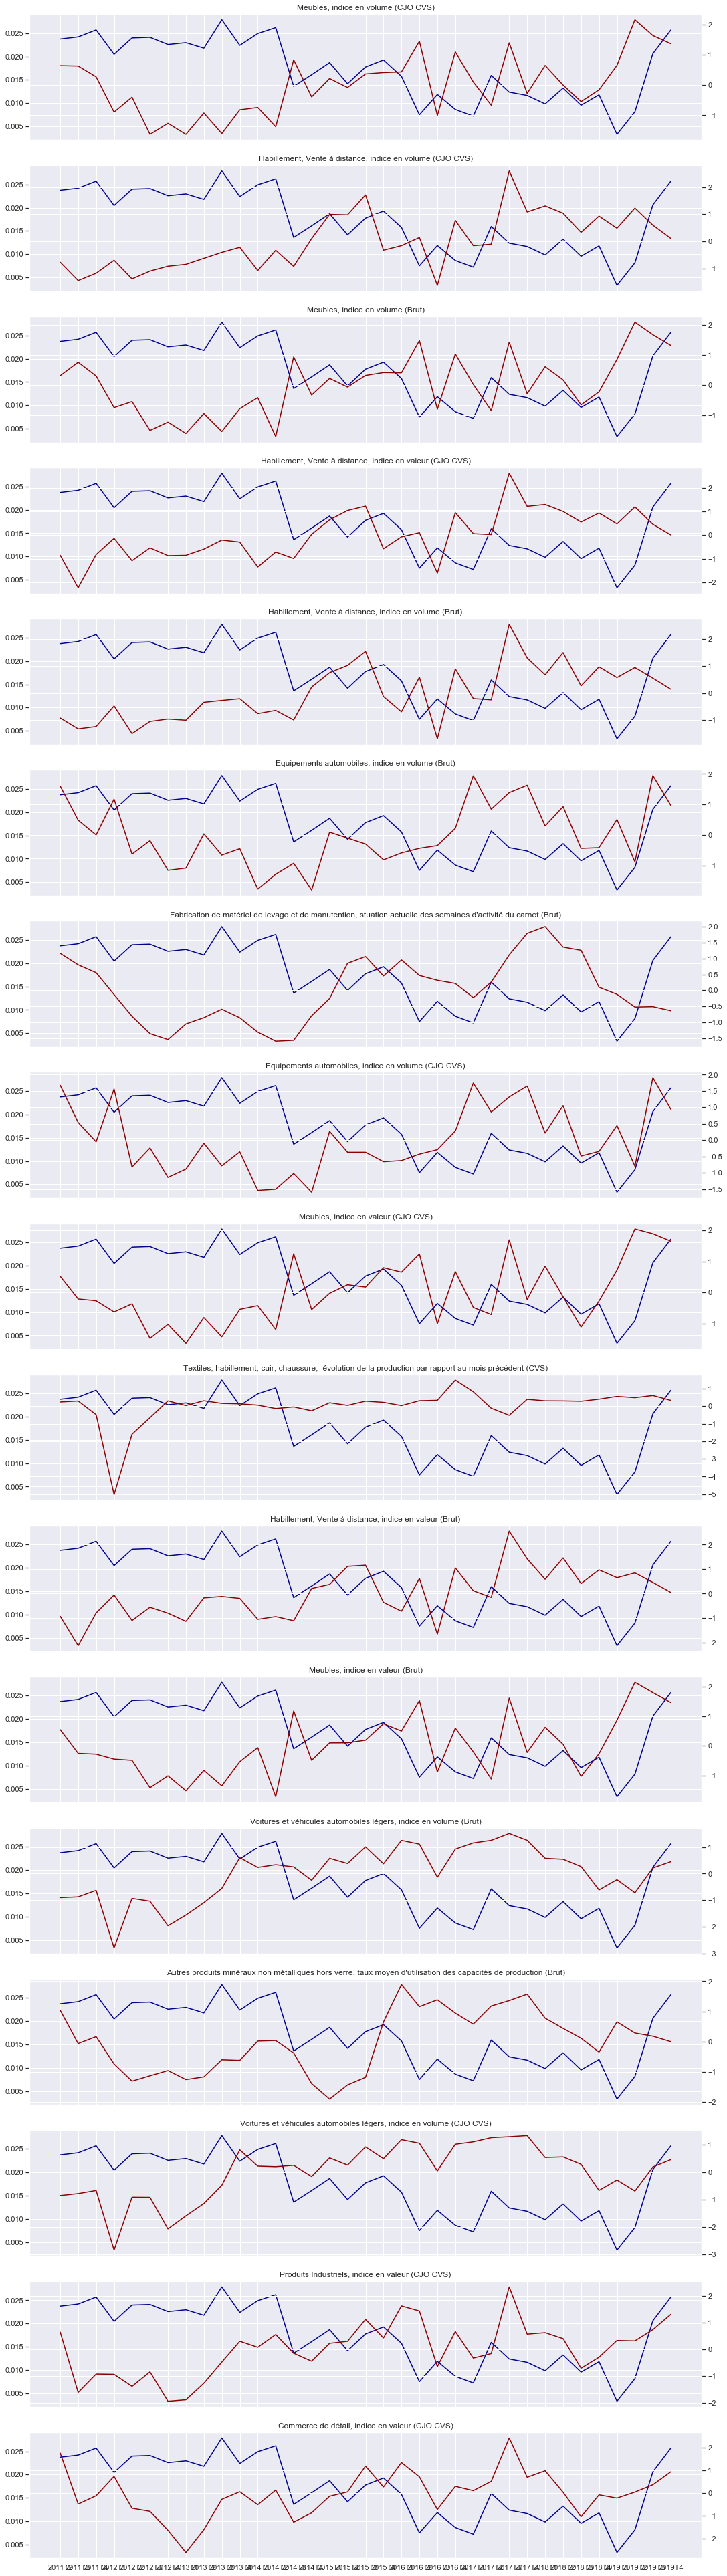

<Figure size 432x288 with 0 Axes>

In [71]:
#Graphiques de variations
sns.set()
figure3, axes3 = plt.subplots(len(X_var[correl(X_var.columns).index].columns),1,figsize=(18,70),sharex=True)
axes3twin = [None] * len(axes3)

for i in range(len(axes3)):
    axes3[i].plot(yty_var_tot[::-1],color="darkblue",label="Variation de la consommation")
    axes3twin[i] = axes3[i].twinx()
    axes3twin[i].plot(X_var[correl(X_var.columns).index][::-1].iloc[:,i],color="darkred",label="Variation de l'indice")
    axes3[i].set_title(X_var[correl(X_var.columns).index][::-1].columns[i])

plt.show()
plt.savefig('test.png')

In [72]:
variablesSelectionCvs.append('Meubles, indice en valeur (CJO CVS)')
variablesSelectionBrut.append('Meubles, indice en valeur (Brut)')

## Corrélations entre les variables sélectionnées

### Etude en CVS

In [90]:
corr_cvs=yty_var_tot.reset_index().merge(X_var[variablesSelectionCvs].reset_index(),on='Date').corr().iloc[1:,0].sort_values(ascending=False)

In [91]:
corr_cvs_abs=abs(corr_cvs)

In [92]:
selectionCVS=corr_cvs_abs.sort_values(ascending=False).index[0:25]

A la main, on supprime les catégories "redondantes".

In [93]:
selectionCVS=selectionCVS.drop("Fabrication d'équipements électriques, taux moyen d'utilisation des capacités de production (CVS)").drop('Commerce de détail, indice en volume (CJO CVS)').drop('Petit commerce, indice en volume (CJO CVS)').drop('Alimentation générale hors boucherie, Hypermarchés, indice en valeur (CJO CVS)').drop("Fabrication d'équipements électriques, évolution des livraisons par rapport au mois précédent (CVS)").drop("Indicateur mensuel du climat des affaires dans l'industrie manufacturière (cvs)")
selectionCVS=selectionCVS.drop('Grande distribution, indice en valeur (CJO CVS)').drop('Supermarchés, indice en volume (CJO CVS)').drop('Petit commerce, indice en valeur (CJO CVS)').drop('Grande distribution, indice en volume (CJO CVS)').drop('Alimentation générale, Petit commerce traditionnel, indice en valeur (CJO CVS)').drop("Equipements électriques et électroniques, autres machines, taux moyen d'utilisation des capacités de production (CVS)")[:-2:]

In [94]:
corrMatrix = abs(X_var[selectionCVS].corr())

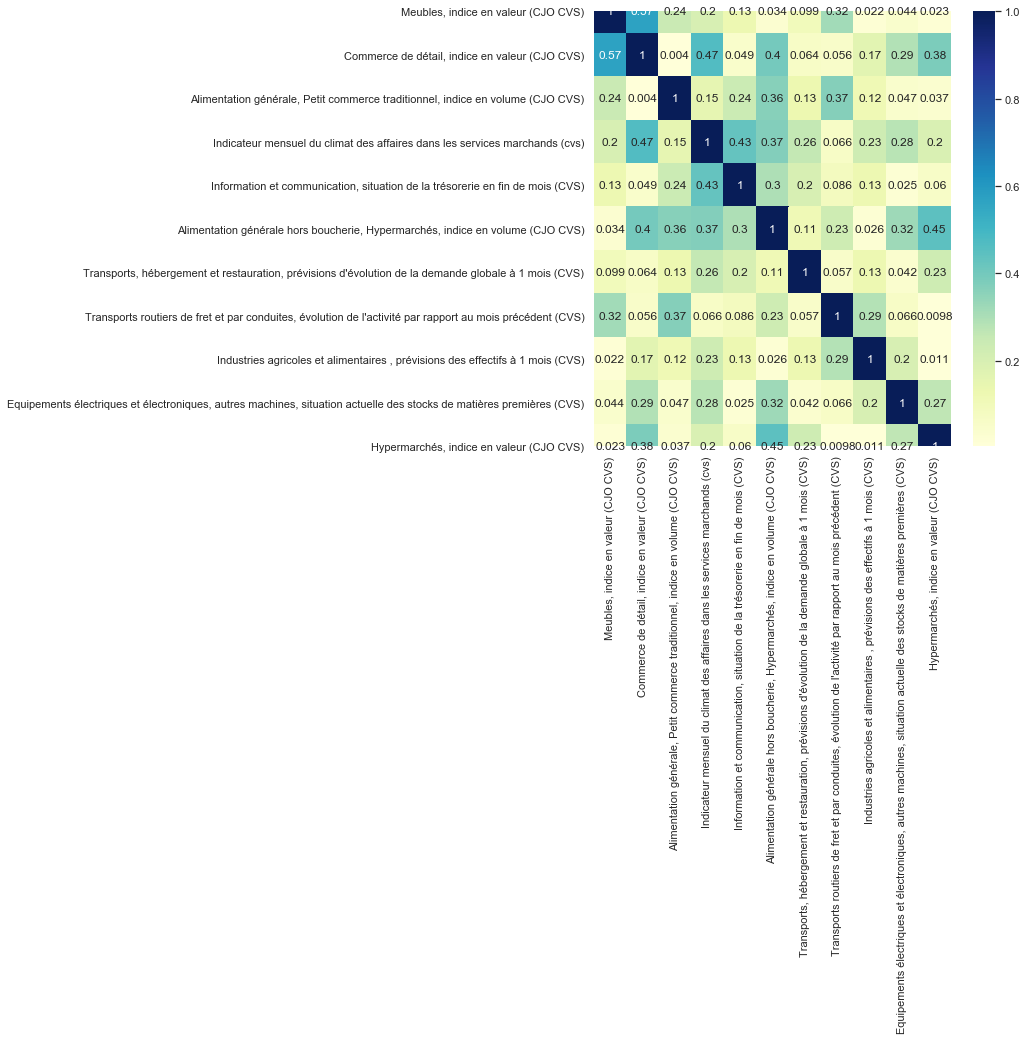

In [95]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corrMatrix,cmap="YlGnBu",annot=True)

In [328]:
"""for i in range(len(selectionCVS)):
    for j in range(i):
        plt.plot(X_var[selectionCVS[j]],X_var[selectionCVS[i]],'ro')
        plt.xlabel(str(X_var[selectionCVS[j]].name))
        plt.ylabel(str(X_var[selectionCVS[i]].name))
        plt.show()"""

"for i in range(len(selectionCVS)):\n    for j in range(i):\n        plt.plot(X_var[selectionCVS[j]],X_var[selectionCVS[i]],'ro')\n        plt.xlabel(str(X_var[selectionCVS[j]].name))\n        plt.ylabel(str(X_var[selectionCVS[i]].name))\n        plt.show()"

In [329]:
#g = pd.plotting.scatter_matrix(X_var[selectionCVS], figsize=(50,50),marker='o',alpha=1)

### Etude en Brut

In [447]:
corr_brut=yty_var_tot.reset_index().merge(X_var[variablesSelectionBrut].reset_index(),on='Date').corr().iloc[1:,0].sort_values(ascending=False)

In [448]:
corr_brut_abs=abs(corr_brut)

In [449]:
selectionBrut=corr_brut_abs.sort_values(ascending=False).index[0:25]

In [450]:
corrMatrix = abs(X_var[selectionBrut].corr())
index=corrMatrix.sort_index(axis=0,ascending=True).reset_index()['index']

In [452]:
selectionBrut=selectionBrut.drop(index[19:21]).drop(index[14:16]).drop(index[4:6]).drop(index[10:14]).drop(index[7]).drop(index[22:24])[:-2:]

In [453]:
corrMatrix = abs(X_var[selectionBrut].corr())

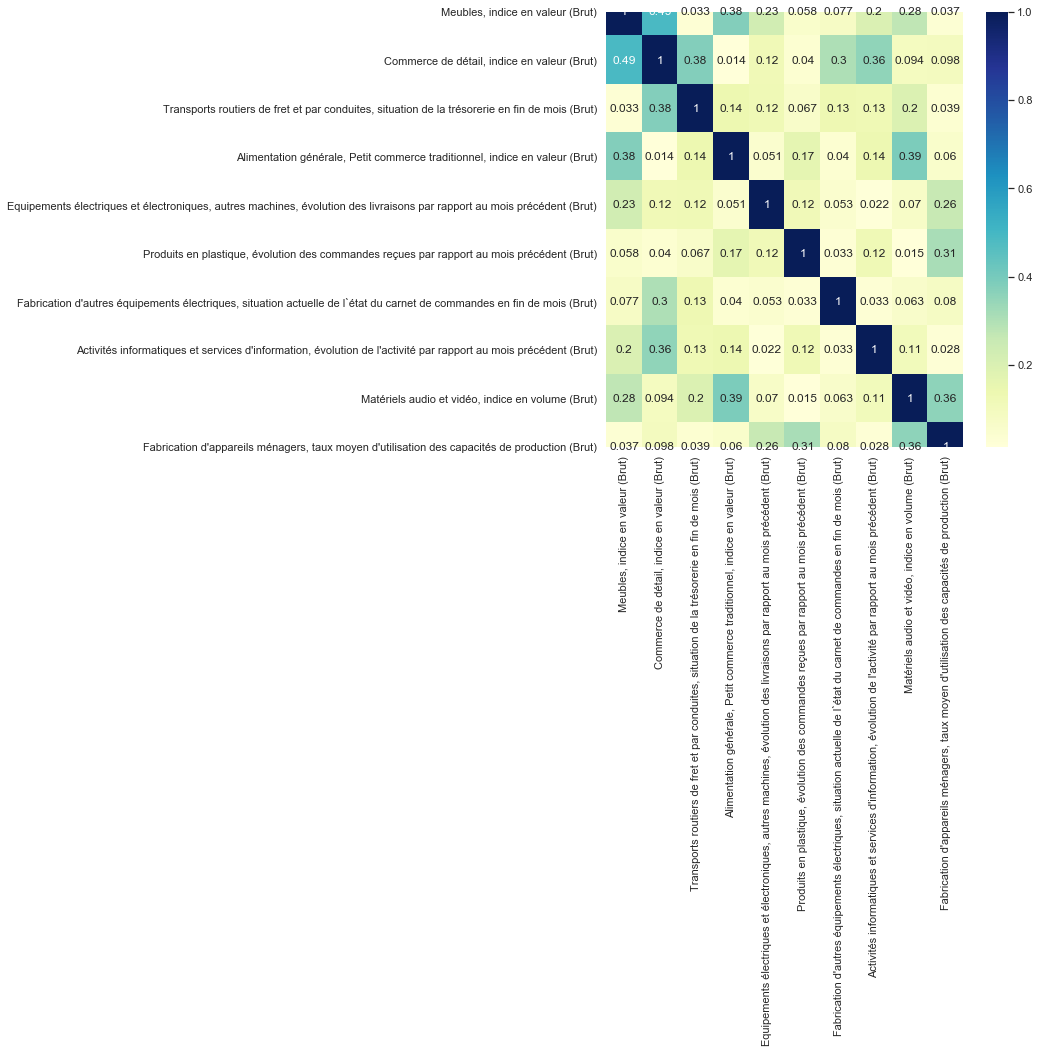

In [454]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corrMatrix,cmap="YlGnBu",annot=True)

## Nom de la sélection

Pour la sélection en CVS : 

In [455]:
selectionCVS

Index(['Meubles, indice en valeur (CJO CVS)',
       'Commerce de détail, indice en valeur (CJO CVS)',
       'Alimentation générale, Petit commerce traditionnel, indice en volume (CJO CVS)',
       'Indicateur mensuel du climat des affaires dans les services marchands (cvs)',
       'Information et communication, situation de la trésorerie en fin de mois (CVS)',
       'Transports, hébergement et restauration, prévisions d'évolution de la demande globale à 1 mois (CVS)',
       'Transports routiers de fret et par conduites, évolution de l'activité par rapport au mois précédent (CVS)',
       'Industries agricoles et alimentaires , prévisions des effectifs à 1 mois (CVS)',
       'Equipements électriques et électroniques, autres machines, situation actuelle des stocks de matières premières (CVS)',
       'Hypermarchés, indice en valeur (CJO CVS)'],
      dtype='object')

Pour la sélection en brut : 

In [456]:
selectionBrut

Index(['Meubles, indice en valeur (Brut)',
       'Commerce de détail, indice en valeur (Brut)',
       'Transports routiers de fret et par conduites, situation de la trésorerie en fin de mois (Brut)',
       'Alimentation générale, Petit commerce traditionnel, indice en valeur (Brut)',
       'Equipements électriques et électroniques, autres machines, évolution des livraisons par rapport au mois précédent (Brut)',
       'Produits en plastique, évolution des commandes reçues par rapport au mois précédent (Brut)',
       'Fabrication d'autres équipements électriques, situation actuelle de l`état du carnet de commandes en fin de mois (Brut)',
       'Activités informatiques et services d'information, évolution de l'activité par rapport au mois précédent (Brut)',
       'Matériels audio et vidéo, indice en volume (Brut)',
       'Fabrication d'appareils ménagers, taux moyen d'utilisation des capacités de production (Brut)'],
      dtype='object')